## Explore Telecom Carier Services 

Explore the data of an American telecom carrier extracted from the services provided to their subscribers. Analyse and visualize abnormalities, outliers, data distribution and covariance between features 

In [434]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import pylab
%matplotlib inline
import math

In [435]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [436]:
churn= pd.read_csv('churn3.txt')
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,IN,122,408,397-4976,no,no,0,170.5,94,28.99,...,109,14.76,248.600000,75,11.19,11.3,2,3.05,1,False.
1,AZ,95,408,334-2577,no,no,0,238.1,65,40.48,...,98,15.91,NaN,115,8.55,11.8,4,3.19,4,False.
2,MI,36,510,400-3637,no,yes,29,281.4,102,47.84,...,76,17.19,187.200000,113,8.42,9.0,6,2.43,2,False.
3,NM,93,510,383-4361,no,yes,21,117.9,131,20.04,...,115,13.98,217.000000,86,9.76,9.8,3,2.65,1,False.
4,CO,141,415,371-4306,no,yes,32,148.6,91,25.26,...,97,11.14,219.400000,142,9.87,10.1,1,2.73,1,False.
5,UT,157,408,403-4298,no,no,0,229.8,90,39.07,...,121,12.57,241.400000,108,10.86,9.6,7,2.59,3,False.
6,MI,120,408,409-3786,no,no,0,165.0,100,28.05,...,83,26.96,119.200000,86,5.36,8.3,8,2.24,1,False.
7,MA,103,415,337-4697,no,no,0,185.0,117,31.45,...,94,18.98,222.800000,91,10.03,12.6,2,3.40,2,False.
8,AL,98,408,383-1509,no,no,0,161.0,117,27.37,...,113,16.23,227.700000,113,10.25,12.1,4,3.27,4,False.
9,DE,125,408,359-9794,no,no,0,126.7,108,21.54,...,90,17.51,247.800000,114,11.15,13.3,7,3.59,1,False.


### Data Exploration
Explore whether there are missing values for any of the variables. Determine the number of observations in the sample.

In [437]:
# Number of missing values per variable
print "Missing values per column: \n", churn.isnull().sum()
# Are there missing values for any of the variable
is_missing_values_present = churn.isnull().values.any()
print("%s, There are missing values for one of the variable in the dataset"%is_missing_value_present)
#Total number of missing values
Total_missing_values = churn.isnull().sum().sum()
list_of_cols = [col for col in churn.columns if churn[col].isnull().any()]
print "There are",Total_missing_values, "missing values in column ", list_of_cols
# The number of observations in the sample
number_of_observations = churn.shape[0]
print("The number of observations in the sample is %d " %number_of_observations)

Missing values per column: 
State              0
Account Length     0
Area Code          0
Phone              0
Int'l Plan         0
VMail Plan         0
VMail Message      0
Day Mins           0
Day Calls          0
Day Charge         0
Eve Mins           0
Eve Calls          0
Eve Charge         0
Night Mins        10
Night Calls        0
Night Charge       0
Intl Mins          0
Intl Calls         0
Intl Charge        0
CustServ Calls     0
Churn?             0
dtype: int64
True, There are missing values for one of the variable in the dataset
There are 10 missing values in column  ['Night Mins']
The number of observations in the sample is 3229 


### Look for apparent abnormalities

In [438]:
# a Create a pivot table which shows the number of observations with 'State'-values vertical and 'Area Code'-values horizontal. See also: pbpython.com/pandas-pivot-table-explained.html
all_names_index = pd.pivot_table(churn, index=["State","Area Code"],aggfunc={"Area Code":len})
print(all_names_index)

                 Area Code
State Area Code           
AK    408               12
      415               23
      510               14
AL    408               25
      415               40
      510               14
AR    408               13
      415               26
      510               14
AZ    408               14
      415               33
      510               13
CA    408                7
      415               16
      510               10
CO    408               22
      415               28
      510               12
CT    408               22
      415               39
      510               13
DC    408               14
      415               26
      510               12
DE    408               12
      415               31
      510               17
FL    408               12
      415               30
      510               20
...                    ...
SD    408               15
      415               28
      510               16
TN    408               11
 

In [439]:
#b Abnormalities State vs. Area Code
#Same Area Codes appear in different States, eg: (415 in AK) AND (415 in WY)
df2 = pd.DataFrame(churn, columns=["State", "Area Code"]).set_index("State", "Area Code")
df2.sort_index()

,Area Code
State,
AK,510
AK,415
AK,408
AK,415
AK,415
AK,415
AK,415
AK,415
AK,408


### Determine outliers
Use a histogram to determine visually whether there are any outliers among the number of *calls to customer service*, i.e. column $\texttt{'CustServ Calls'}$.

(array([ 0.69577785,  0.        ,  0.        ,  1.18612574,  0.        ,
         0.        ,  0.76700733,  0.        ,  0.        ,  0.        ,
         0.42015072,  0.        ,  0.        ,  0.16310519,  0.        ,
         0.        ,  0.06503561,  0.        ,  0.        ,  0.        ,
         0.02271085,  0.        ,  0.        ,  0.0092908 ,  0.        ,
         0.        ,  0.00206462,  0.        ,  0.        ,  0.00206462]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ]),
 <a list of 30 Patch objects>)

Text(0.5,0,u'Value')

Text(0,0.5,u'Frequency')

Text(0.5,1,u'Histogram of Customer Service Calls')

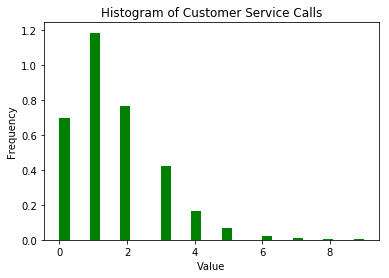

In [440]:
data = list(churn['CustServ Calls'])
plt.hist(data, normed=True, bins=30, color='green')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title('Histogram of Customer Service Calls')

Identify how many *customer service calls*, i.e. column $\texttt{'CustServ Calls'}$, should be considered outliers, using:
* a. The Z-score method, and
* b. The IQR method.

In [441]:
# a. The Z-score method
#a Z-score method
def outliers_z_score(x):
    ct = 3
    mean_x = np.mean(x)
    stdev_x = np.std(x)
    z_scores = [(item - mean_x) / stdev_x for item in x]

    outlier = [round(e,3) for e in z_scores if np.abs(e) > ct]
    return outlier

out = outliers_z_score(churn['CustServ Calls'])
for e in set(out):
    print "Outlier", "{0:.3f}".format(e), ", Nr of Occurances : ", out.count(e)
print "Number of total outliers: ", len(out)
print "Unique outliers (Z-score method): ", list(set(out))

Outlier 3.382 , Nr of Occurances :  22
Outlier 4.144 , Nr of Occurances :  9
Outlier 4.905 , Nr of Occurances :  2
Outlier 5.667 , Nr of Occurances :  2
Number of total outliers:  35
Unique outliers (Z-score method):  [3.382, 4.144, 4.905, 5.667]


In [442]:
# b. The IQR method

q1, q3 = np.percentile(churn['CustServ Calls'].dropna(), [25,75])
iqr = q3 - q1
 
min = q1 - (iqr*1.5)
max = q3 + (iqr*1.5)
print "Values in the range : [-infinity,", min, "] and [", max, ", +infinity]"

x = churn['CustServ Calls']
outlier = []
for item in x:
    if item < min or item > max:
        outlier.append(item)
        
for e in set(outlier):
    print "Outlier", e, ", Nr of Occurances : ", outlier.count(e)
print "Number of total outliers: ", len(outlier)
print "Unique outliers (IQR method): ", list(set(outlier))

Values in the range : [-infinity, -0.5 ] and [ 3.5 , +infinity]
Outlier 4 , Nr of Occurances :  158
Outlier 5 , Nr of Occurances :  63
Outlier 6 , Nr of Occurances :  22
Outlier 7 , Nr of Occurances :  9
Outlier 8 , Nr of Occurances :  2
Outlier 9 , Nr of Occurances :  2
Number of total outliers:  256
Unique outliers (IQR method):  [4, 5, 6, 7, 8, 9]


### Analize the data distribution 
Estimate the skewness as follows:
* a. Calculate the skewness of *day minutes*, i.e. column $\texttt{'Day Mins'}$, based on $\text{Skewness}=3\frac{(\text{mean}-\text{median})}{\text{standard deviation}}$.
* b. Then calculate the skewness of the Z-score standardized *day minutes*. Comment.
* c. Based on the skewness value, would you consider *day minutes* to be skewed or nearly
perfectly symmetric?

In [443]:
# a. Calculate the skewness of day minutes, i.e. column  '𝙳𝚊𝚢 𝙼𝚒𝚗𝚜''Day Mins' , based on  Skewness
data_day_mins = list(churn['Day Mins'])
dayMinutes_skew = 3*((np.mean(data_day_mins) - np.median(data_day_mins)) / np.std(data_day_mins))
print "The skewness of day minutes is", "{0:.3f}".format(dayMinutes_skew)

The skewness of day minutes is 0.015


In [444]:
# b. Then calculate the skewness of the Z-score standardized day minutes. Comment.
mean_day_mins = np.mean(data_day_mins)
stdev_day_mins = np.std(data_day_mins)
z_scores_day_mins = [(y - mean_day_mins) / stdev_day_mins for y in data_day_mins]
z_score_standardized_day_mins=3*(np.mean(z_scores_day_mins) - np.median(z_scores_day_mins) / np.std(z_scores_day_mins))
print "The skewness of the Z-score standardized day minutes is", "{0:.3f}".format(z_score_standardized_day_mins)

The skewness of the Z-score standardized day minutes is 0.015


(array([  14.,   65.,  198.,  462.,  775.,  787.,  573.,  254.,   82.,   19.]),
 array([   0.  ,   35.08,   70.16,  105.24,  140.32,  175.4 ,  210.48,
         245.56,  280.64,  315.72,  350.8 ]),
 <a list of 10 Patch objects>)

Text(0.5,0,u'Value')

Text(0,0.5,u'Frequency')

Text(0.5,1,u'Histogram of Day Mins')

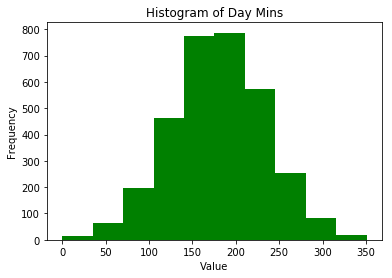

In [445]:
# c. Based on the skewness value, would you consider day minutes to be skewed or nearly perfectly symmetric ?
# Answer : As the value is Positive, it indicates that mean of the *day minutes* is larger than the median 
# in other words the mean is right-side of the median and thus the data distribution is rightly skewed.
# since the positive value is near to zero thus the data distribution is nearly perfectly symmetric.
plt.hist(data_day_mins, color='green')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title('Histogram of Day Mins')

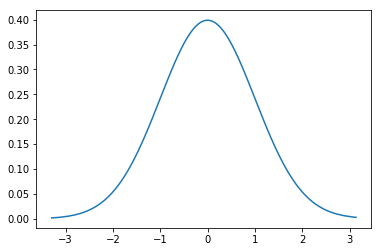

In [446]:
# c. contd ...

def z_score_standardization(x):
    mean_x = np.mean(x)
    stdev_x = np.std(x)
    z_scores = [(item - mean_x) / stdev_x for item in x]
    return z_scores
z_day_min = z_score_standardization(churn["Day Mins"])
z_day_min.sort()
hmean = np.mean(z_day_min)
hstd = np.std(z_day_min)
pdf = stats.norm.pdf(z_day_min, hmean, hstd)
plt.plot(z_day_min, pdf)

Work with *international minutes*, i.e. column $\texttt{'Intl Mins'}$, as follows.
* a. Construct a normal probability plot of *international minutes*.
* b. What is stopping this variable from being normally distributed?
* c. Construct a flag variable or dummy variable to deal with the situation in (b).
* d. Construct a normal probability plot of the derived variable *nonzero international minutes*. Comment on the normality.

((array([-3.52139654, -3.27893387, -3.14492092, ...,  3.14492092,
          3.27893387,  3.52139654]),
  array([  0. ,   0. ,   0. , ...,  18.4,  18.9,  20. ])),
 (2.7897158858492794, 10.237844533911428, 0.9966910178659274))

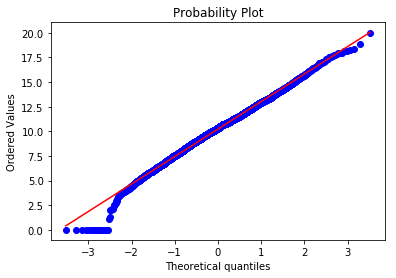

In [447]:
# a. Construct a normal probability plot of international minutes. [Hint: use stats.probplot.]
data_Intl_mins = list(churn['Intl Mins'])
stats.probplot(data_Intl_mins, dist="norm", plot=pylab)
pylab.show()

 b. What is stopping this variable from being normally distributed ? <BR>
Ans : For 'international minutes' data values there is a deviation from the linearity in the left hand side of the plot. Also, as the plot seems to be an downward C ,the distribution of data can be slightly left skewed.

In [448]:
#Eliminate skewness (achieve symetry) => Normalization
def skewness(x):
    mean_x = np.mean(x)
    medin_x = np.median(x)
    stdev_x = np.std(x)
    sk = 3 * (mean_x - medin_x) / stdev_x
    return sk

def is_skewed(l):
    sk = skewness(l)
    sk = round(sk,2)
    return "Skewness: sk = " + str(sk) + "\n" + print_skeweness(sk)

def print_skeweness(sk):
    if sk > 0:
        return "Day minutes is skewed (Right skewed)"
    elif sk < 0:
        return "Day minutes is skewed (Left skewed)"
    else: #sk == 0
        return "Day minutes is perfectly symetric" 

print is_skewed(churn['Intl Mins'])

Skewness: sk = -0.07
Day minutes is skewed (Left skewed)


In [449]:
# c. Construct a flag variable or dummy variable to deal with the situation in (b).
nonzero_intl_mins = []
for y in data_Intl_mins :
    if y <= 0: 
        nonzero_intl_mins.append(0)
    else :
        nonzero_intl_mins.append(1)
        
print "Flag list based on situation a) ", nonzero_intl_mins




Flag list based on situation a)  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

((array([-3.52139654, -3.27893387, -3.14492092, ...,  3.14492092,
          3.27893387,  3.52139654]), array([0, 0, 0, ..., 1, 1, 1])),
 (0.015859717070949499, 0.99442551873645091, 0.21280343995990988))

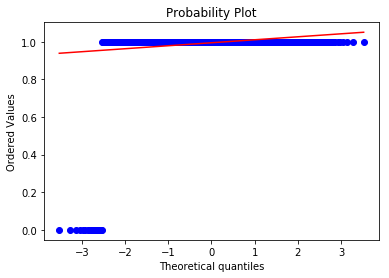

In [450]:
# d. Construct a normal probability plot of the derived variable nonzero international minutes. Comment on the normality.
stats.probplot(nonzero_intl_mins, dist="norm", plot=pylab)
pylab.show()

### Determine the covariance 
Determine the covariance between *Day Minutes* and *Night Minutes*.

In [451]:
#Covariance between Day Minutes and Night Minutes
#churn["Day Mins"]
#day_mins = churn["Day Mins"].dropna(axis=0)
#Keep the size
day_mins = churn["Day Mins"]
night_mins = night_mins.fillna(value='0.')

#churn["Night Mins"]
#night_mins = churn["Night Mins"].dropna(axis=0)
#Keep the size
night_mins = churn["Night Mins"]
night_mins = night_mins.fillna(value='0.')
#Clean the data
night_mins = night_mins.replace("\'|\"| ","", regex=True).astype(float)

print "Covariance between Day Minutes and Night Minutes: ", round(np.cov(day_mins,night_mins)[0][1],3)

Covariance between Day Minutes and Night Minutes:  1.877
